<a href="https://colab.research.google.com/github/bharatsoni0047/Credit-Card-Default-Prediction/blob/Airbnb-Analysis/Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [ ]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
#from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay
#from sklearn.metrics import precision_recall_curve
#from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset
dataset = pd.read_excel('/content/drive/MyDrive/Supervised/Classification/Default of credit card clients.xls',header = 1)

In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
# Check shape of dataset
dataset.shape

(30000, 25)

In [ ]:
# Checking first 5 rows in dataset
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# Checking last 5 rows in dataset
dataset.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


## Features Description

We have records of 30000 customers. Below are the description of all features:

1. ID: ID of each client
2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
3. SEX: Gender (1=male, 2=female)
4. EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others)
5. MARRIAGE: Marital status (1=married, 2=single, 3=others)
6. AGE: Age in years
7. PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months,8=payment delay for eight months, 9=payment delay for nine months and above)
8. PAY_2: Repayment status in August, 2005 (scale same as above)
9. PAY_3: Repayment status in July, 2005 (scale same as above)
10. PAY_4: Repayment status in June, 2005 (scale same as above)
11. PAY_5: Repayment status in May, 2005 (scale same as above)
12. PAY_6: Repayment status in April, 2005 (scale same as above)
13. BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
14. BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
15. BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
16. BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
17. BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
18. BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
19. PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
20. PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
21. PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
22. PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
23. PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
24. PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
25. default.payment.next.month: Default payment (1=yes, 0=no)


In [ ]:
# Checking basic information of our dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
# Exploring descriptive statistical parameters
dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
# checking the total number of null values in every column
dataset.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
# checking for identical rows if present
dataset.duplicated().sum()

0

In [ ]:
# Rename the columns
dataset = dataset.rename(columns={'default payment next month': 'DEFAULT_PAYMENT','PAY_0': 'PAY_1'})
dataset.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAYMENT
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1


## Exploratory Data Anlaysis

0    23364
1     6636
Name: DEFAULT_PAYMENT, dtype: int64


Text(0.5, 1.0, 'Default Credit Card Clients\n (Default = 1, Not Default = 0)')

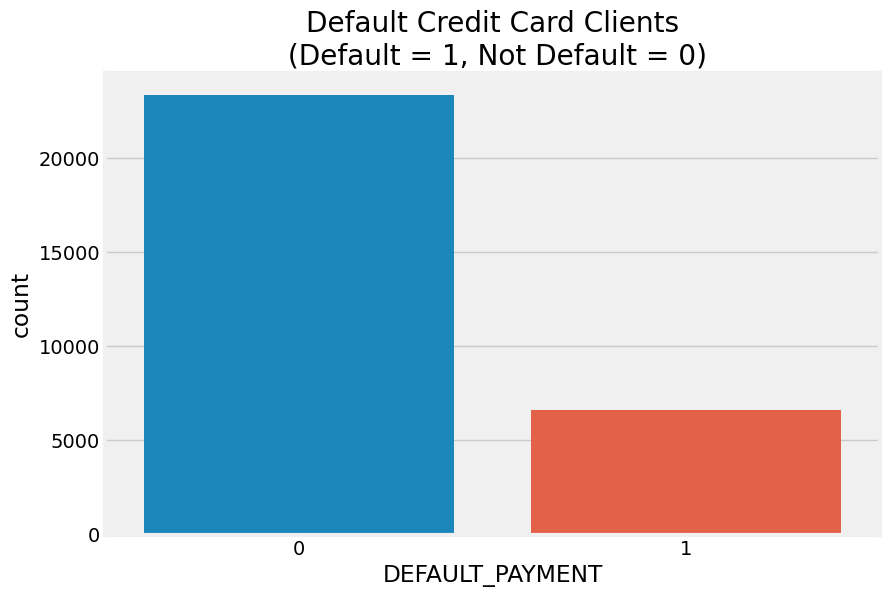

In [ ]:
# plotting value counts of dependent variable
print(dataset['DEFAULT_PAYMENT'].value_counts())
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
sns.countplot(x = 'DEFAULT_PAYMENT', data = dataset)
plt.title('Default Credit Card Clients\n (Default = 1, Not Default = 0)')

Defaulters are less as compared to the Non-Defaulters in the given dataset.

In [ ]:
# Creating a list of categorical independent variable
independent_variable = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE']

In [ ]:
# Value counts of the variable "independent_variable"
for col in independent_variable:
  print(dataset[col].value_counts())

2    18112
1    11888
Name: SEX, dtype: int64
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64


In [ ]:
# Replacing the value as according to feature description
dataset["EDUCATION"] = dataset["EDUCATION"].replace({0:4,5:4,6:4})
dataset["MARRIAGE"] = dataset["MARRIAGE"].replace({0:3})

In [ ]:
# Value counts after replacing of "EDUCATION", "MARRIAGE"
print(dataset['EDUCATION'].value_counts())
print(dataset['MARRIAGE'].value_counts())

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64
2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64


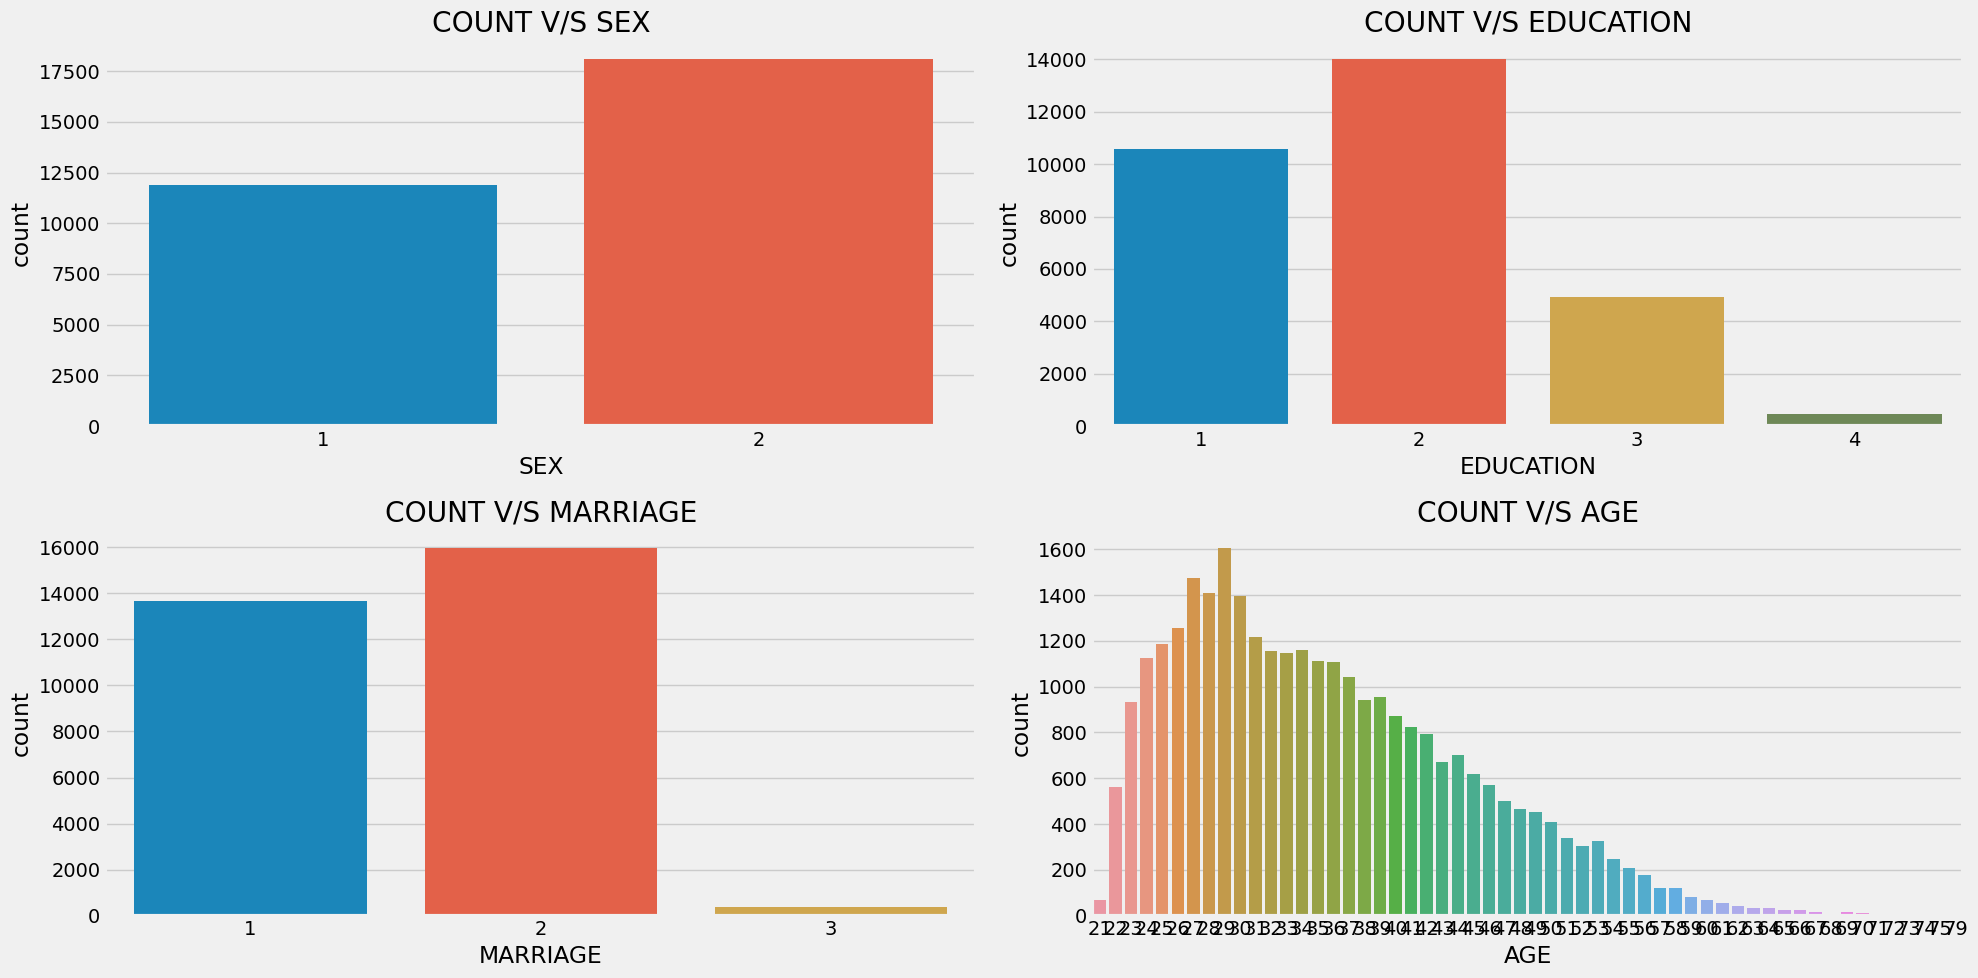

In [ ]:
# Plotting the countplot graph for "independent_variable"
plt.figure(figsize=(20, 10))
rows=2
cols=2
counter=1

for col in independent_variable:
  plt.subplot(rows,cols,counter)
  sns.countplot(x = col, data= dataset)
  plt.title(f'COUNT V/S {col}')
  counter=counter+1
  plt.tight_layout()

<Axes: xlabel='DEFAULT_PAYMENT', ylabel='AGE'>

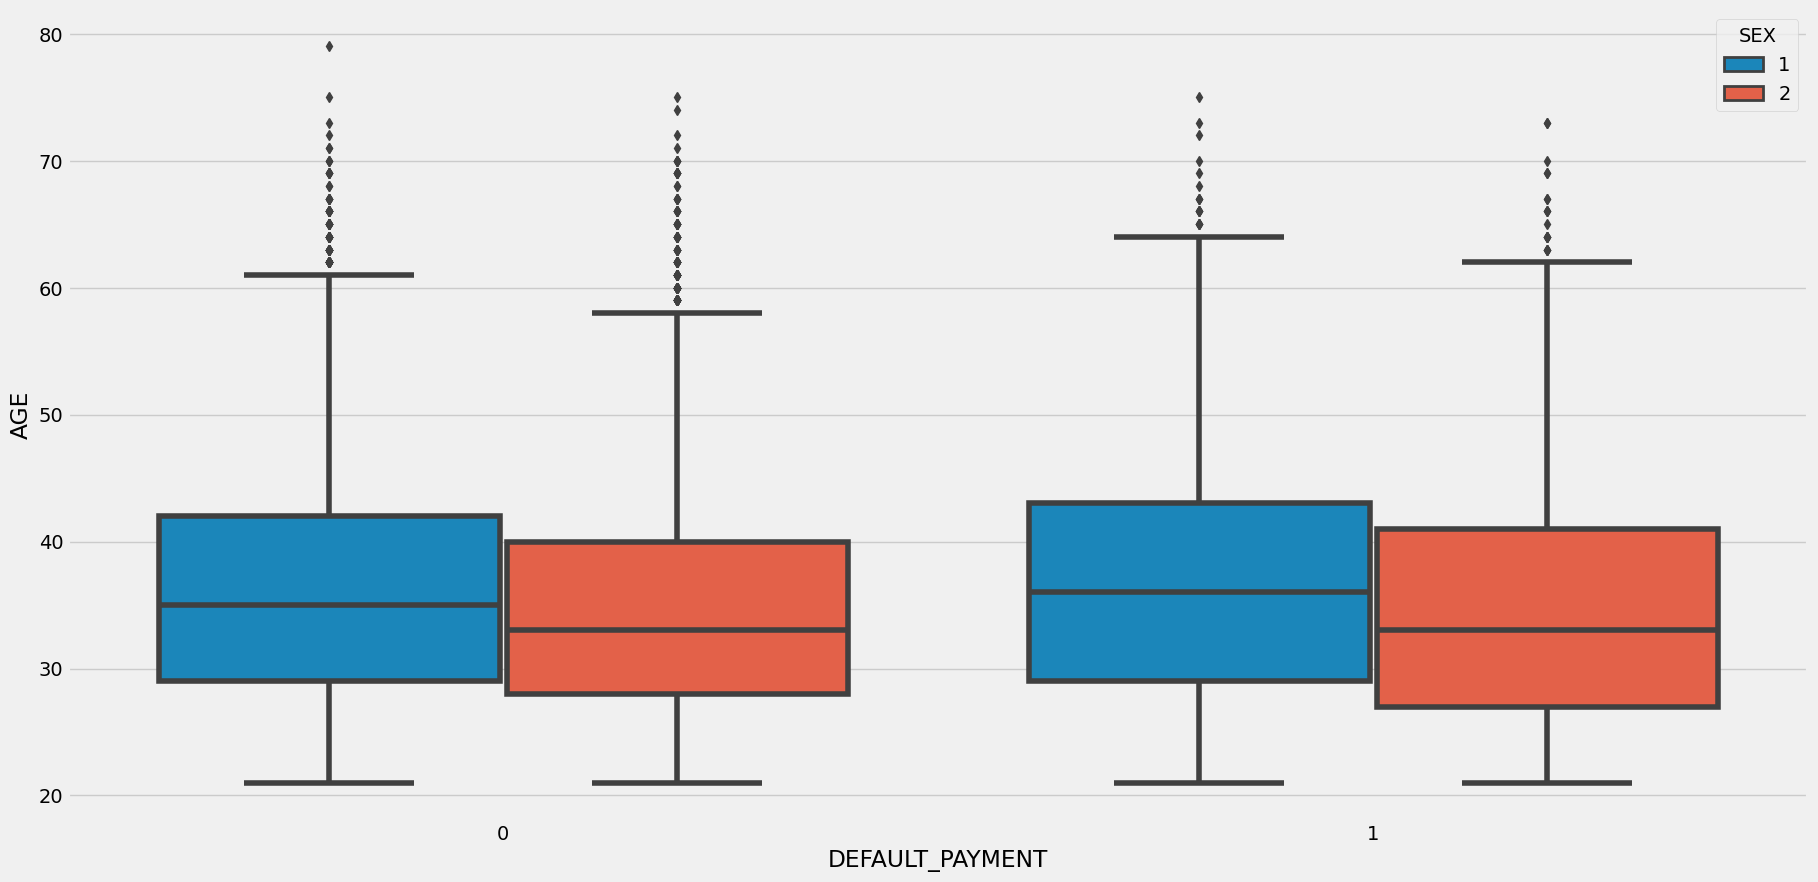

In [ ]:
# Creating a box plot of AGE V/S DEFAULT_PAYMENT with respect to sex
plt.figure(figsize=(20,10))
sns.boxplot(x='DEFAULT_PAYMENT',hue='SEX', y='AGE',data=dataset)

<Axes: xlabel='DEFAULT_PAYMENT', ylabel='AGE'>

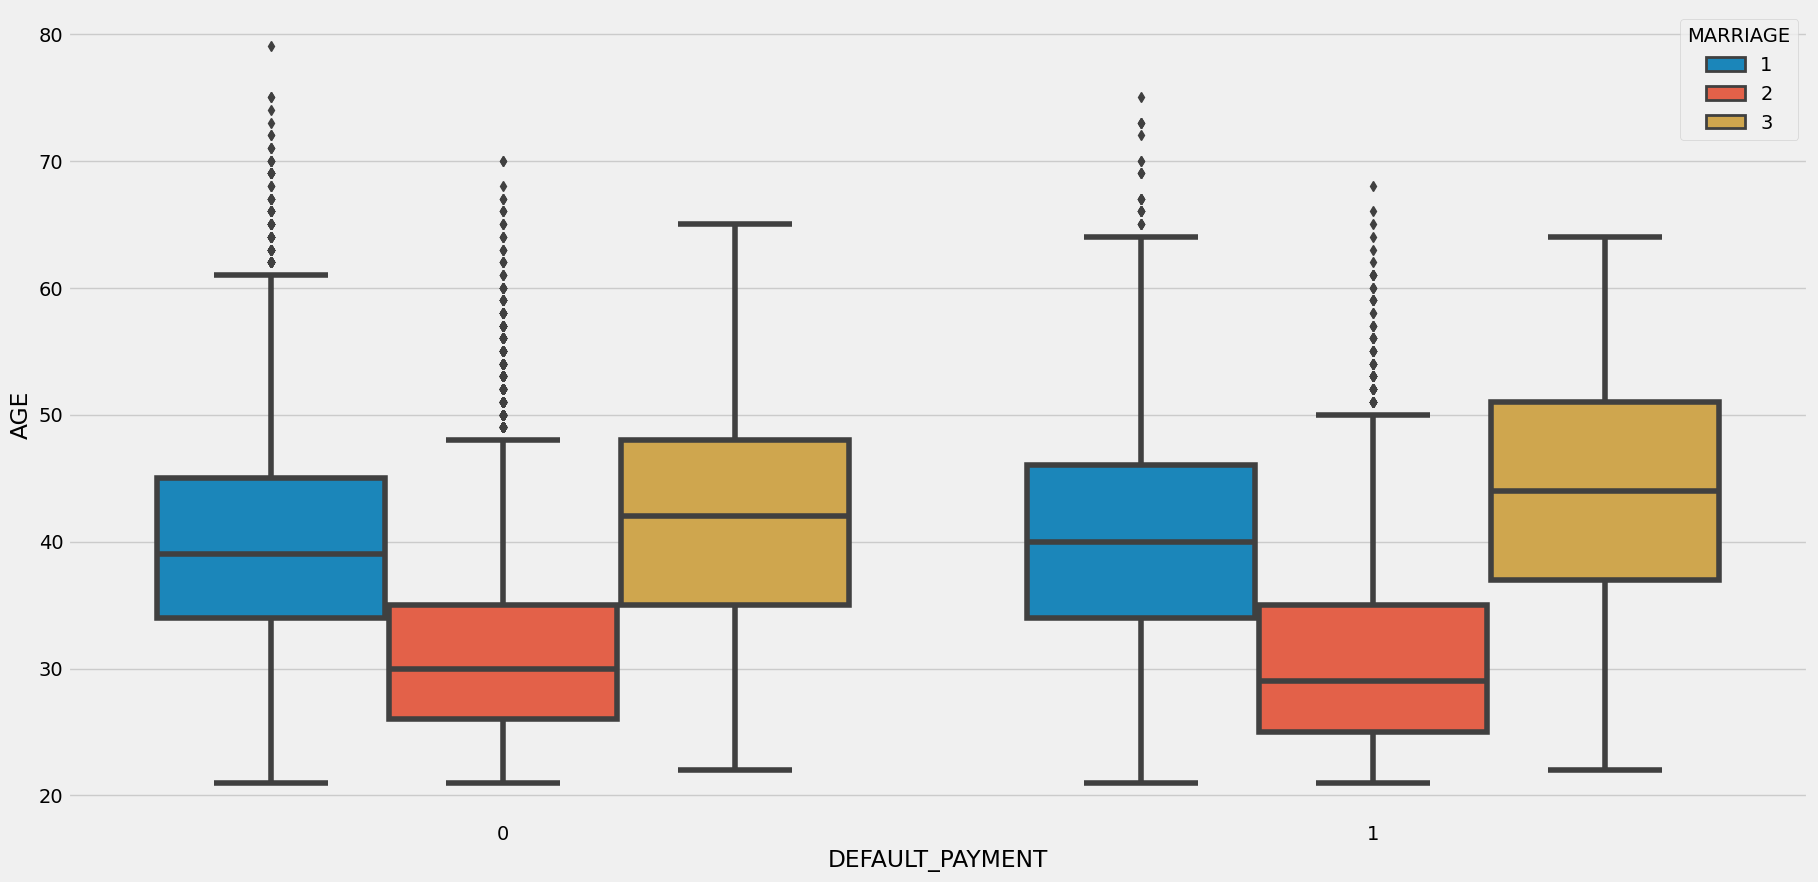

In [ ]:
# Creating a box plot of AGE V/S DEFAULT_PAYMENT with respect to marriage
plt.figure(figsize=(20,10))
sns.boxplot(x='DEFAULT_PAYMENT',hue='MARRIAGE', y='AGE',data=dataset)

<Axes: xlabel='DEFAULT_PAYMENT', ylabel='AGE'>

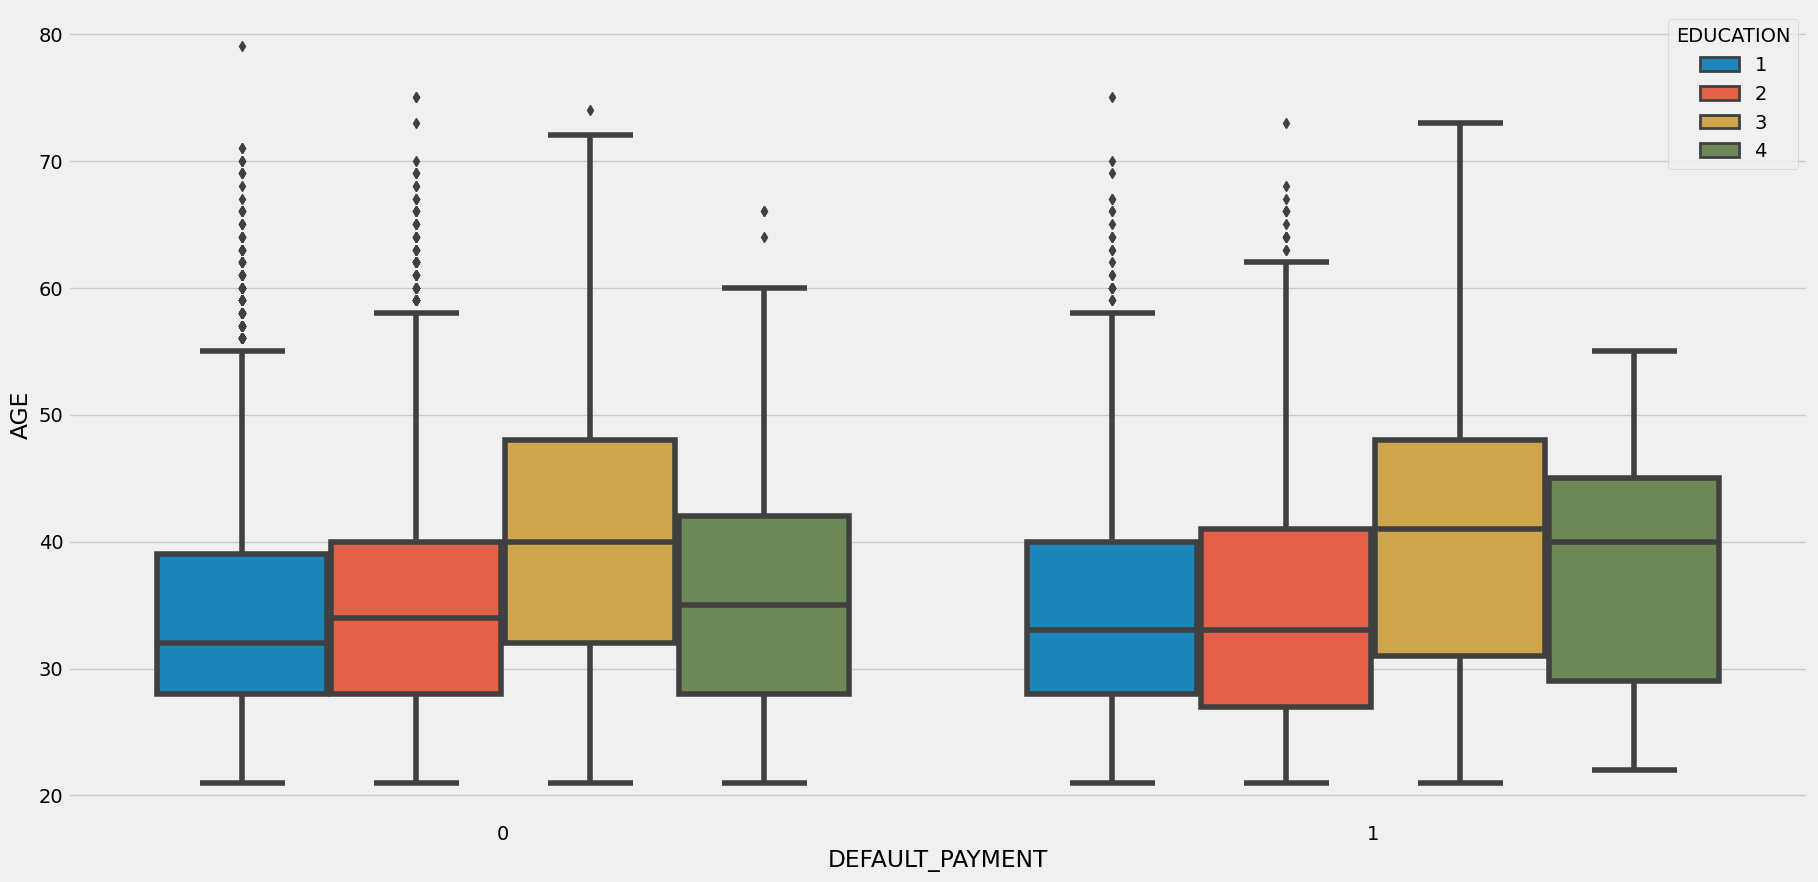

In [ ]:
# Creating a box plot of AGE V/S DEFAULT_PAYMENT with respect to education
plt.figure(figsize=(20,10))
sns.boxplot(x='DEFAULT_PAYMENT',hue='EDUCATION', y='AGE',data=dataset)

In [ ]:
# Creating a function to get columnn names in the given range.
def getColumnsNames(prefix):
  '''
  This function is used for columnn names in the given range.
  '''
  return [prefix+str(x) for x in range(1,7)]

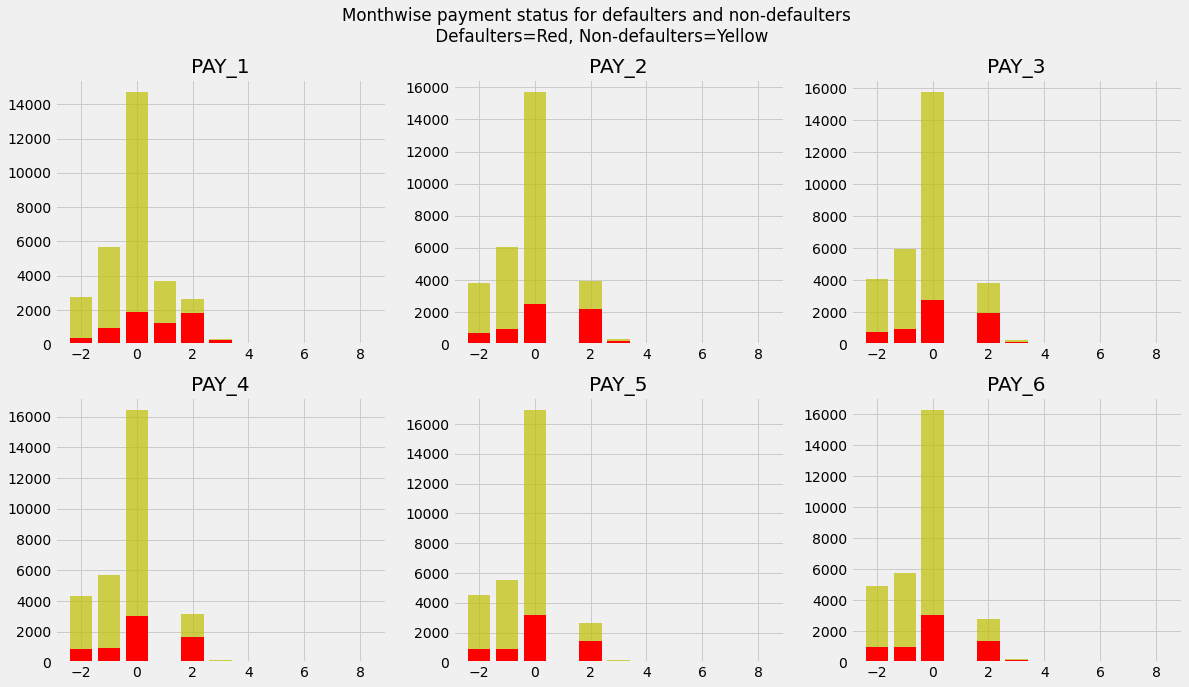

In [ ]:
# PAY_1 , PAY_2 , PAY_3 , PAY_4 , PAY_5, PAY_6
pay_status_columns = getColumnsNames('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,10)
for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d = dataset[pay_status_columns[i]].value_counts()
    x = dataset[pay_status_columns[i]][(dataset['DEFAULT_PAYMENT']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='y',alpha = 0.7)
    ax[row,col].bar(x.index, x, align='center', color='red')
    ax[row,col].set_title(pay_status_columns[i])
    plt.suptitle("Monthwise payment status for defaulters and non-defaulters \n Defaulters=Red, Non-defaulters=Yellow")

The above figure shows bar plot for each month payment status which show the count of defaulters and non-defaulter.

In [ ]:
def plot_graph(prefix):
  pay_columns = getColumnsNames(prefix)
  figure, ax = plt.subplots(3,2)
  figure.set_size_inches(18,10)
  for i in range(len(pay_columns)):
    row,col =  i%3, int(i/3)

    ax[row,col].hist(dataset[pay_columns[i]], 30, color='y',alpha = 0.7)
    ax[row,col].hist(dataset[pay_columns[i]][(dataset['DEFAULT_PAYMENT']==1)],30,color='red')
    ax[row,col].set_title(pay_columns[i])
    plt.suptitle(f"Monthwise {prefix} distribution for defaulters and non-defaulters \n Defaulters=Red, Non-defaulters=Yellow")
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')

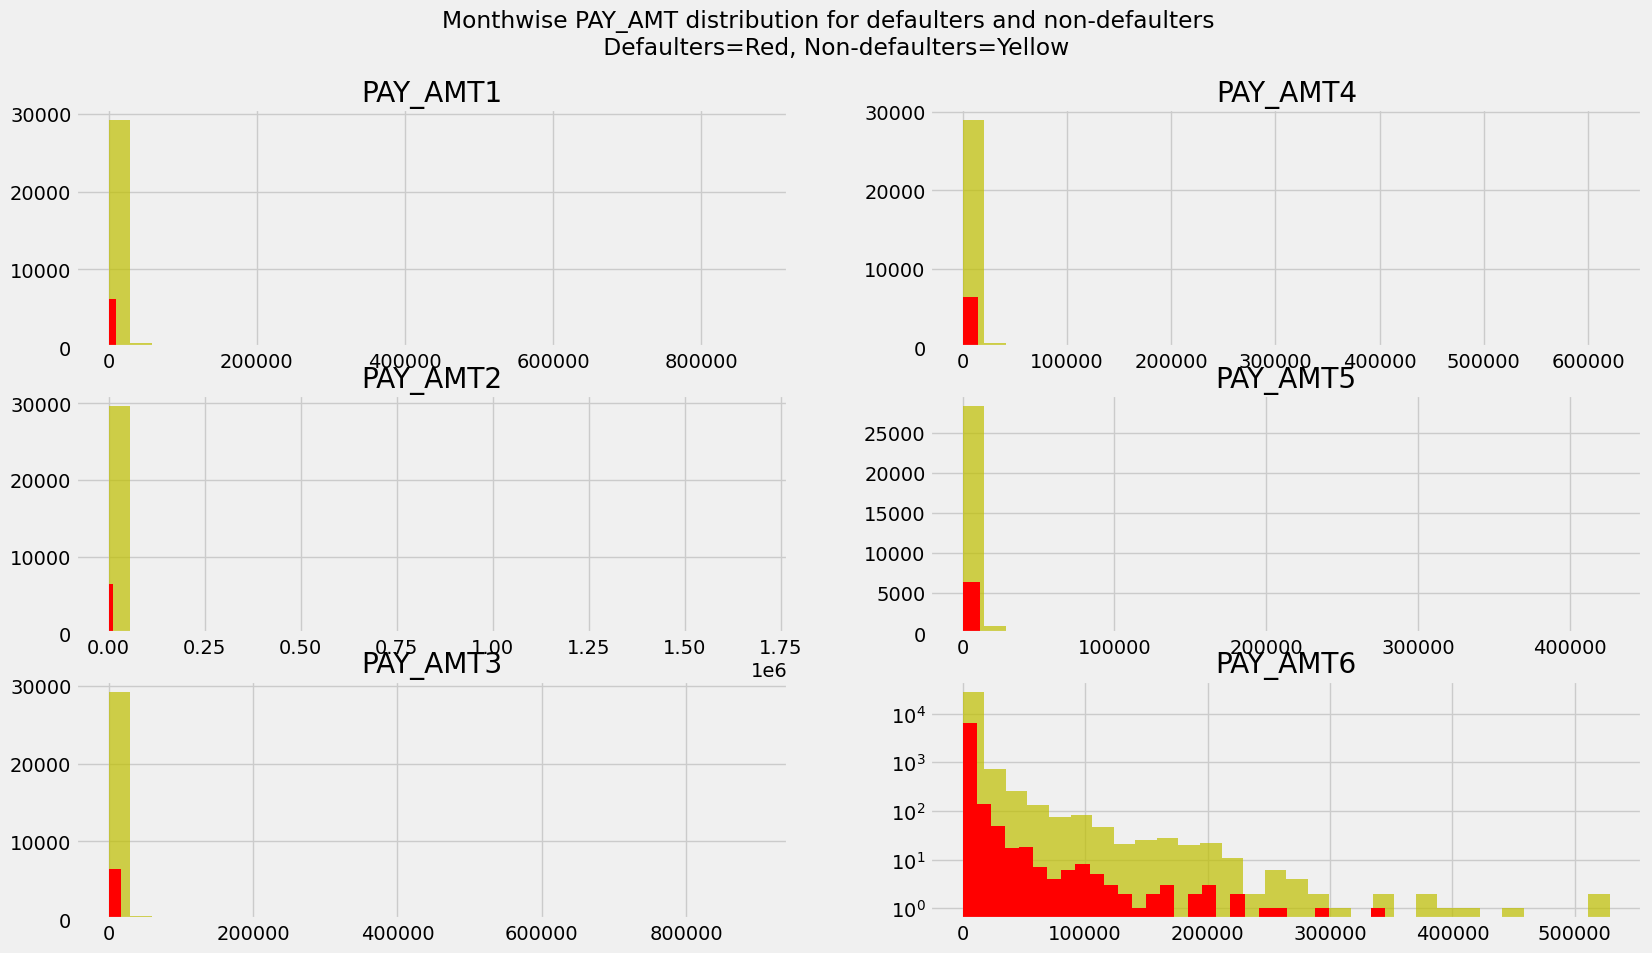

In [ ]:
def plot_graph(prefix):
  pay_columns = getColumnsNames(prefix)
  figure, ax = plt.subplots(3, 2)
  figure.set_size_inches(18, 10)
  for i in range(len(pay_columns)):
    row, col = i % 3, int(i / 3)

    ax[row, col].hist(dataset[pay_columns[i]], 30, color='y', alpha=0.7)
    ax[row, col].hist(dataset[pay_columns[i]][(dataset['DEFAULT_PAYMENT'] == 1)], 30, color='red')
    ax[row, col].set_title(pay_columns[i])
  plt.suptitle(f"Monthwise {prefix} distribution for defaulters and non-defaulters \n Defaulters=Red, Non-defaulters=Yellow")

  # Change the y-axis scale to logarithmic
  ax[row, col].set_yscale('log')

plot_graph('PAY_AMT')


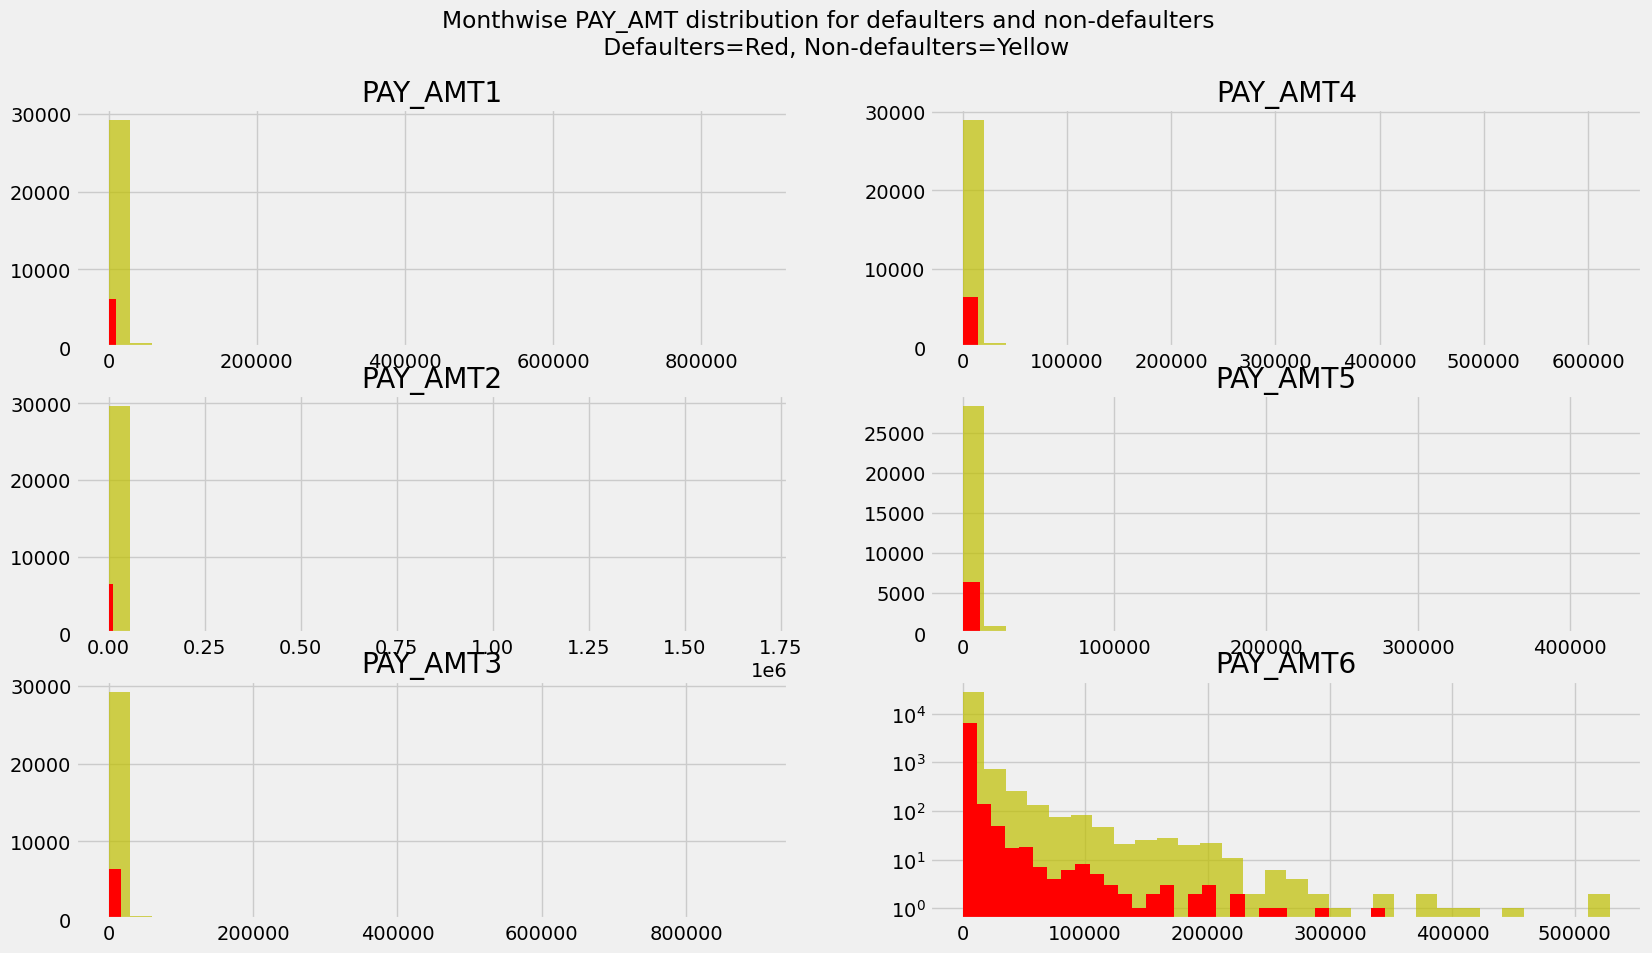

In [ ]:
plot_graph('PAY_AMT')

The above histogram shows the distribution of payment amount for each month explicitly for defaulters and non-defaulters.

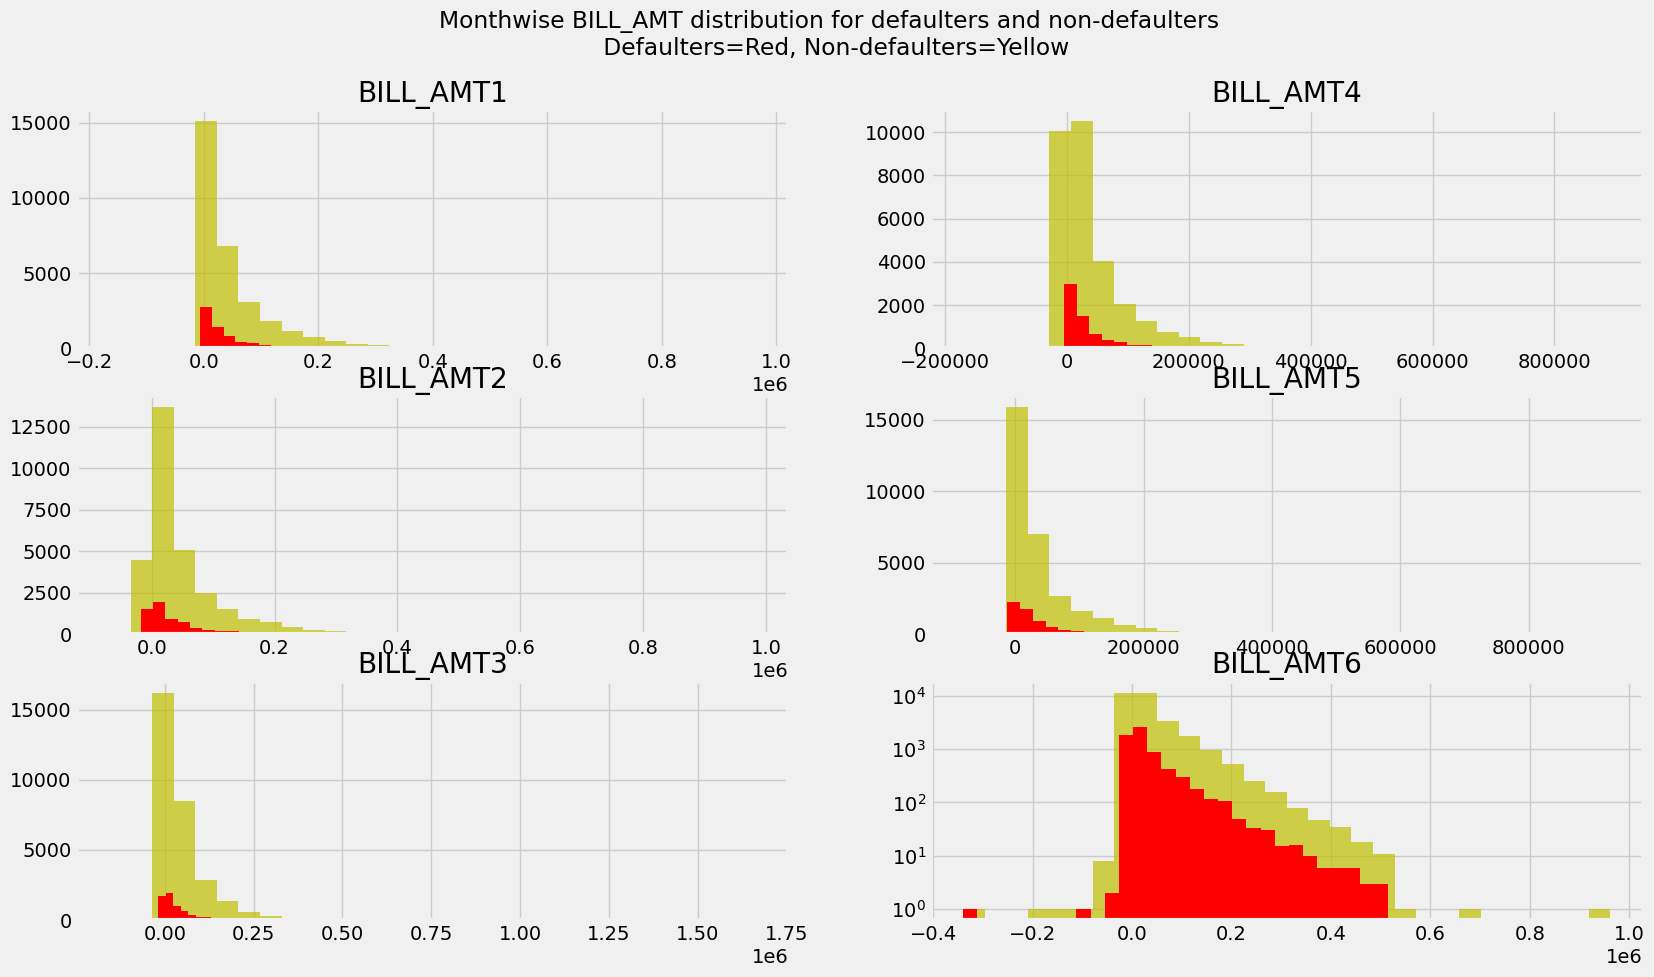

In [ ]:
plot_graph('BILL_AMT')

The above histogram shows the distribution of Bill amount generated for each month explicitly for defaulters and non-defaulters.

<ipython-input-42-d67556acfcc1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['LIMIT_BAL'],kde=True,bins=30)


<Axes: xlabel='LIMIT_BAL', ylabel='Density'>

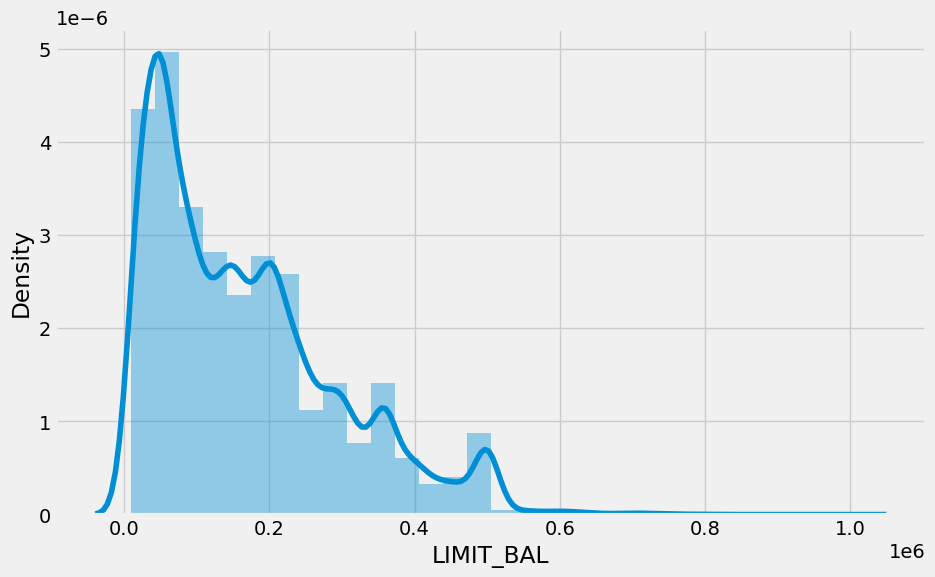

In [ ]:
# Creating a distplot for "LIMIT_BAL"
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
sns.distplot(dataset['LIMIT_BAL'],kde=True,bins=30)

## Correlation

In [ ]:
# Dropping the column "ID"
dataset = dataset.drop(['ID'],axis=1)

<Axes: >

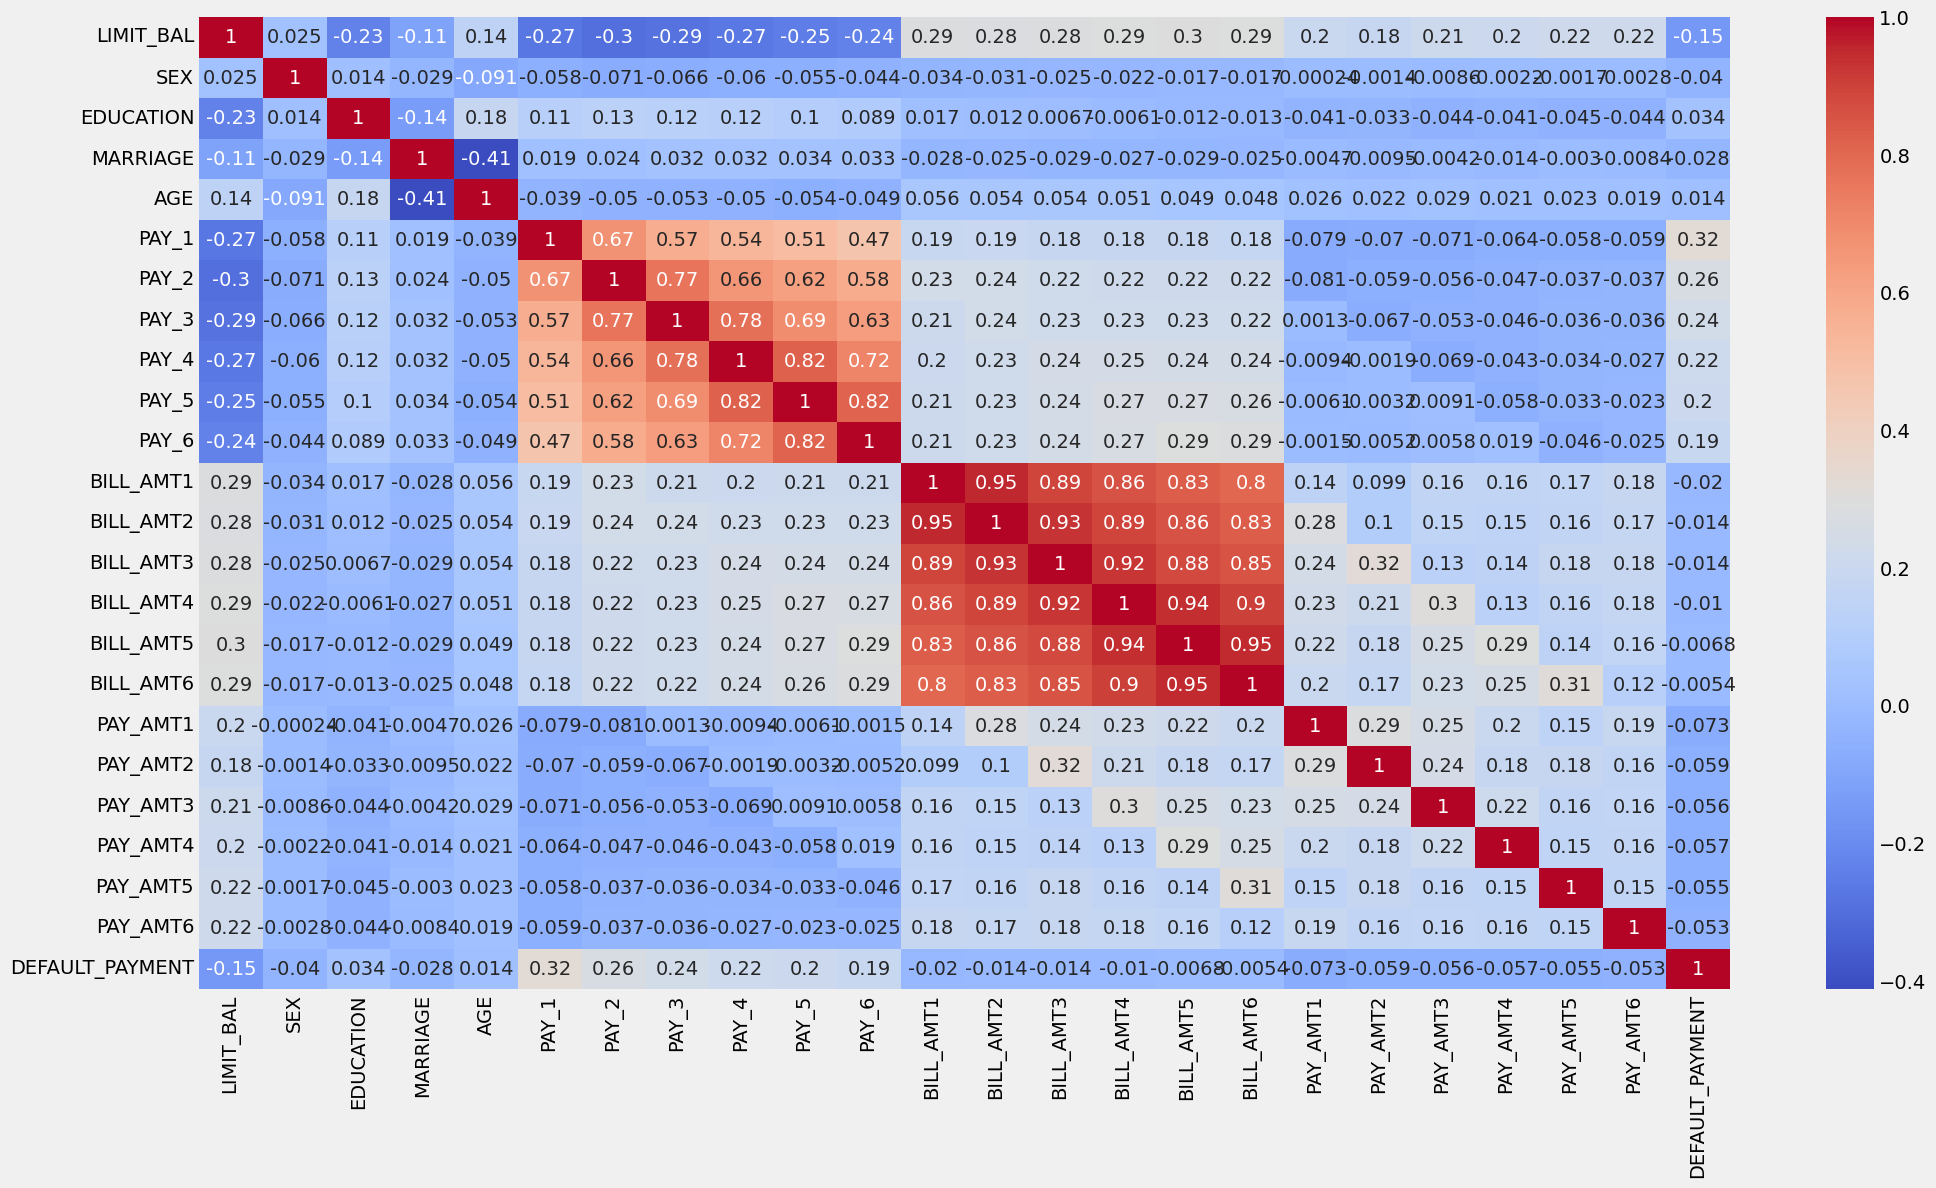

In [ ]:
# Finding the correlation between different attribute
plt.figure(figsize=(22,12))
sns.heatmap(dataset.corr(),annot=True,cmap="coolwarm")

<ipython-input-45-1abb47004df9>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


<Axes: title={'center': 'Correlation with Default_Payment'}>

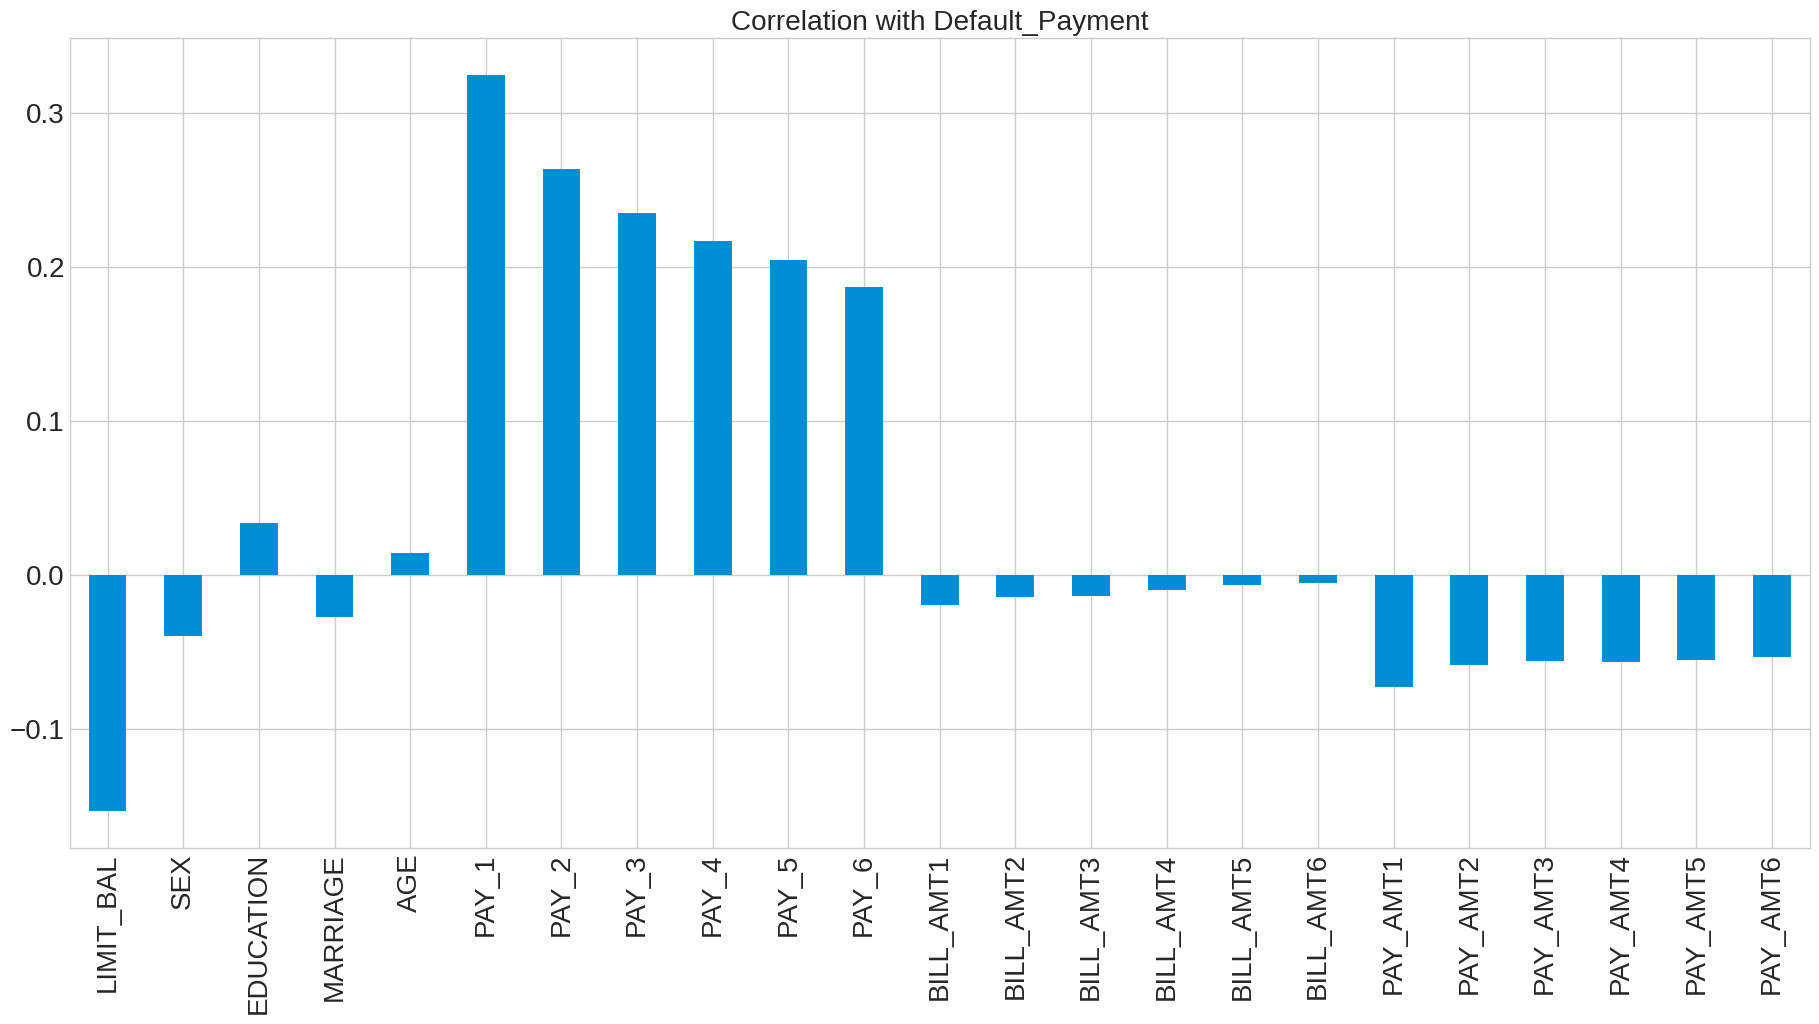

In [ ]:
# Correlation between independent variables and dependent variable.
X = dataset.drop(['DEFAULT_PAYMENT'],axis=1)
plt.style.use('seaborn-whitegrid')
X.corrwith(dataset['DEFAULT_PAYMENT']).plot.bar(figsize = (20, 10), title = "Correlation with Default_Payment",
                                        fontsize = 20,rot = 90, grid = True)

It seems from the above graph is that most negatively correlated feature is LIMIT_BAL but we cannot blindly remove this feature because it may be important feature for prediction.

## SMOTE (Synthetic Minority Oversampling Technique)

In [ ]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Creating a SMOTE function.
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, dataset['DEFAULT_PAYMENT'])

print('Original shape of Dataset', len(X))
print('Resampled shape of Dataset', len(y_smote))

Original shape of Dataset 30000
Resampled shape of Dataset 46728


In [ ]:
# Creating a new dataframe after using SMOTE
balance_df = pd.DataFrame(x_smote, columns = list(X.columns))
balance_df['DEFAULT_PAYMENT'] = y_smote

<Axes: xlabel='DEFAULT_PAYMENT', ylabel='count'>

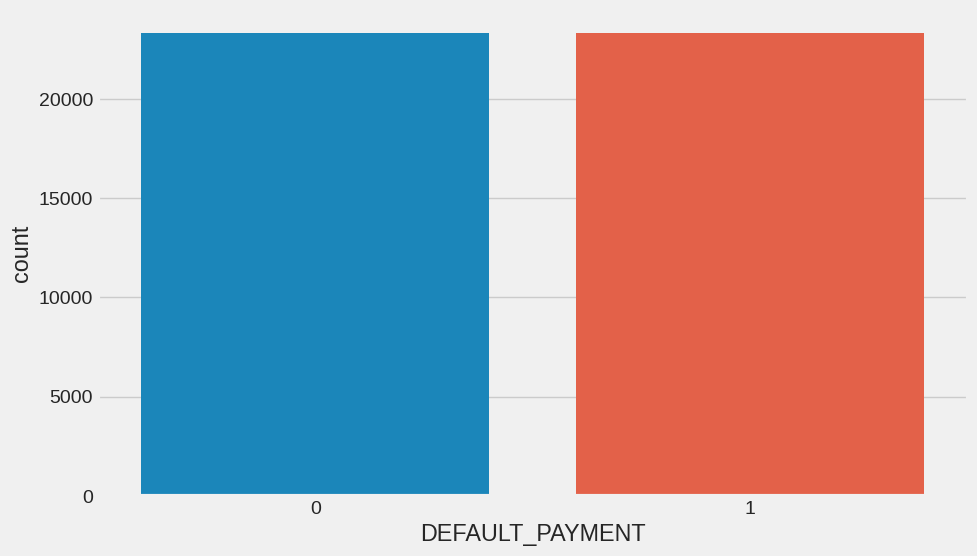

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 6))
sns.countplot(data=balance_df, x='DEFAULT_PAYMENT')


In [ ]:
balance_df[balance_df['DEFAULT_PAYMENT']==1]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAYMENT
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
13,70000,1,2,2,30,1,2,2,0,0,2,65802,67369,65701,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,20000,1,1,2,24,0,0,2,2,2,2,15376,18010,17428,18338,17905,19104,3200,0,1500,0,1650,0,1
21,120000,2,2,1,39,-1,-1,-1,-1,-1,-1,316,316,316,0,632,316,316,316,0,632,316,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,240000,1,1,1,41,1,2,2,1,1,1,134484,135303,135689,141362,144528,143901,3852,3968,8798,5396,1693,9018,1
46724,80000,2,2,1,34,0,0,-1,0,-1,-1,3338,-386,6593,4543,1783,3639,306,8312,386,1783,3639,2706,1
46725,20000,1,2,2,26,0,0,0,0,0,0,9490,10492,11428,11397,12063,12752,1350,1415,450,1000,1099,750,1
46726,218986,1,1,1,28,2,0,0,1,1,1,205276,211416,224306,116639,116169,112738,9469,18722,253,8578,510,8102,1


In [ ]:
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(x_smote,y_smote, test_size = 0.2, random_state = 24,stratify = y_smote)

## Feature Engineering

In [ ]:
# Creating a dummy copy of our dataset
df = balance_df.copy()

In [ ]:
# Bin ‘AGE’ data to 6 groups
bins= [21,30,40,50,60,70,80]
labels = list(range(6))
df['AGE'] = pd.cut(df['AGE'],bins=bins, labels=labels,right=False)

In [ ]:
# Covert categorical column into integer by extracting the code of the categories
df = df.astype({"AGE":'int64'})

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAYMENT
0,20000,2,2,1,0,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,0,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,1,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,1,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,3,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# Define predictor variables and target variable
X = df.drop(columns=['DEFAULT_PAYMENT'])
y = df['DEFAULT_PAYMENT']

# Save all feature names as list
feature_cols = X.columns.tolist()

# Extract numerical columns and save as a list for rescaling
X_num = X.drop(columns=['SEX', 'EDUCATION', 'MARRIAGE', 'AGE'])
num_cols = X_num.columns.tolist()

In [ ]:
# Define function to split data

def data_split(X, y):
  '''
  This function is used for splitting data into train and test.
  '''
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
  return X_train, X_test, y_train, y_test

In [ ]:
# Define function to rescale training data using StandardScaler

def standard_scaler(X_train, X_test, numerical_cols):

  # Make copies of dataset
  X_train_std = X_train.copy()
  X_test_std = X_test.copy()

  # Apply standardization on numerical features only
  for i in numerical_cols:
    scl = StandardScaler().fit(X_train_std[[i]])     # fit on training data columns
    X_train_std[i] = scl.transform(X_train_std[[i]]) # transform the training data columns
    X_test_std[i] = scl.transform(X_test_std[[i]])   # transform the testing data columns

  return X_train_std,X_test_std

## Logistic Regression

In [ ]:
def run_logistic_regression():
  '''
  This function can call Logistic Regression Model.
  '''
  # Split data
  X_train, X_test, y_train, y_test = data_split(X, y)

  # Rescale data
  X_train_std, X_test_std = standard_scaler(X_train, X_test, numerical_cols = num_cols)

  # Instantiate model
  clf_lr = LogisticRegression(random_state=42)

  # Fit the model
  clf_lr.fit(X_train_std, y_train)

  # Use model's default parameters to get cross validation score
  scores = cross_val_score(clf_lr, X_train_std, y_train, scoring ="roc_auc", cv = 5)
  roc_auc_lr = np.mean(scores)

  return "Logistic Regression", roc_auc_lr

In [ ]:
# Creating a dataframe to store "ROC_AUC Score" of different "Model"
model_result = []

# Storing the value in dataframe for Logistic Regression model.
model_result.append(run_logistic_regression())
pd.DataFrame(model_result, columns = ["Model", "ROC_AUC Score"])

,Model,ROC_AUC Score
0,Logistic Regression,0.792802


### Tune Parameters of Logistic Regression


In [ ]:
# Split data with SMOTE
X_train, X_test, y_train, y_test = data_split(X, y)

# Rescale data
X_train_std, X_test_std = standard_scaler(X_train, X_test, numerical_cols = num_cols)

In [ ]:
# paramter grid values for hyperparameter tunning.
grid_values = {'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
               'penalty':['l2', 'l1']}

# Instantiate the model
clf_lr = LogisticRegression(random_state=42)

# Instantiate grid search model
grid_search = GridSearchCV(estimator = clf_lr, param_grid = grid_values, cv = 3, verbose = 1)

# Fit grid search to the data
grid_search.fit(X_train_std, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2', 'l1']},
             verbose=1)

In [ ]:
# getting best parameters for model.
grid_search.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [ ]:
# Using the optimal data and fitting the data
lr_best = LogisticRegression(penalty = 'l2', C = 0.01)
lr_optimal = lr_best.fit(X_train_std, y_train)

In [ ]:
# Get ROC_AUC score of tuned model on training data
scores_tuned = cross_val_score(lr_optimal, X_train_std, y_train, scoring = "roc_auc", cv = 5)
roc_auc_lr_best = np.mean(scores_tuned)

print(f'ROC_AUC score after tuning parameters:{roc_auc_lr_best}')

ROC_AUC score after tuning parameters:0.7928174015322754


After fine-tuning parameter C, Logistic Regression model got ROC_AUC training score as 0.79413, slightly decreased from original score 0.79144. This could mean model is less overfitting the training data.

In [ ]:
# Define a function to compute Accuracy, Precision, Recall and F1 score
def get_pre_rec_f1(model,X_test,y_test,title):
  '''
  This function calculates accuracy, precision, recall and F1 score using confusion matrix.
  '''
  y_pred = model.predict(X_test)
  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

  accuracy = (tp + tn) / (tn + fp + tp + fn)
  precision = tp / (tp + fp)
  recall = tp / (tp + fn)
  F1 = 2 * (precision * recall) / (precision + recall)

  return title,accuracy, precision,recall,F1

In [ ]:
# Creating a dataframe to store "Accuracy", "Precision", "Recall", "F1 score" of different "Model"
model_report = []

# Storing the value in dataframe for Logistic Regression model.
model_report.append(get_pre_rec_f1(lr_optimal, X_test_std, y_test,"Logistic Regression"))
pd.DataFrame(model_report, columns = ["Model","Accuracy", "Precision", "Recall", "F1 Score"])

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.722876,0.720934,0.727208,0.724057


## Decision Tree Classifier

Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data.
So here we will use X_train,X_test,y_test and Y_train which are not scaled.

In [ ]:
def run_decision_tree():
  '''
  This function can call Decision Tree Model.
  '''
  # Split data
  X_train, X_test, y_train, y_test = data_split(X, y)

  # Instantiate model
  clf_dt = DecisionTreeClassifier()

  # Fit the model
  clf_dt.fit(X_train, y_train)

  # Use model's default parameters to get cross validation score
  scores = cross_val_score(clf_dt, X_train, y_train, scoring ="roc_auc", cv = 5)
  roc_auc_dt = np.mean(scores)

  return "Decision Tree", roc_auc_dt

In [ ]:
# Storing the value in dataframe for decision tree model.
model_result.append(run_decision_tree())
pd.DataFrame(model_result, columns = ["Model", "ROC_AUC Score"])

,Model,ROC_AUC Score
0,Logistic Regression,0.792802
1,Decision Tree,0.741595


### Tune Parameters of Decision Tree Classifier

In [ ]:
# Split data with SMOTE
X_train, X_test, y_train, y_test = data_split(X, y)

In [ ]:
# paramter grid values for hyperparameter tunning.
grid_values = {'criterion':['gini','entropy'],
               'max_depth':[2,3,4,5,6,9,10,11,12,13,14,15],
               'splitter':['best','random'],
               'min_samples_split':[3,5,10],
               'max_features':['auto','sqrt','log2',None]}

# Instantiate the model
clf_dt = DecisionTreeClassifier()

# Instantiate grid search model
grid_search = GridSearchCV(estimator = clf_dt, param_grid = grid_values, cv = 3, verbose = 1)

# Fit grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14,
                                       15],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_split': [3, 5, 10],
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
# getting best parameters for model.
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'min_samples_split': 5,
 'splitter': 'best'}

In [ ]:
# Using the optimal data and fitting the data
dt_best = DecisionTreeClassifier(criterion = 'gini', max_depth = 11, max_features = None, min_samples_split = 3, splitter = 'best')
dt_optimal = dt_best.fit(X_train_std, y_train)

In [ ]:
# Get ROC_AUC score of tuned model on training data
scores_tuned = cross_val_score(dt_optimal, X_train, y_train, scoring = "roc_auc", cv = 5)
roc_auc_dt_best = np.mean(scores_tuned)

print(f'ROC_AUC score after tuning parameters:{roc_auc_dt_best}')

ROC_AUC score after tuning parameters:0.8045862925096936


After tuning parameters, Decision Tree model's ROC-AUC score increased to 0.80343.

In [ ]:
# Storing the value in dataframe for Decision Tree model.
model_report.append(get_pre_rec_f1(dt_optimal, X_test, y_test,"Decision Tree"))
pd.DataFrame(model_report, columns = ["Model","Accuracy", "Precision", "Recall", "F1 Score"])

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.722876,0.720934,0.727208,0.724057
1,Decision Tree,0.557529,0.562617,0.516621,0.538639


## Random Forest Classifier

In [ ]:
def run_random_forest():
  '''
  This function can call Random Forest Model.
  '''
  # Split data
  X_train, X_test, y_train, y_test = data_split(X, y)

  # Instantiate model
  clf_rf = RandomForestClassifier()

  # Fit the model
  clf_rf.fit(X_train, y_train)

  # Use model's default parameters to get cross validation score
  scores = cross_val_score(clf_rf, X_train, y_train, scoring ="roc_auc", cv = 5)
  roc_auc_rf = np.mean(scores)

  return "Random Forest", roc_auc_rf

In [ ]:
# Storing the value in dataframe for random forest model.
model_result.append(run_random_forest())
pd.DataFrame(model_result, columns = ["Model", "ROC_AUC Score"])

,Model,ROC_AUC Score
0,Logistic Regression,0.792802
1,Decision Tree,0.741595
2,Random Forest,0.904448


### Tune Parameters of Random Forest Classifier

In [ ]:
# Split data with SMOTE
X_train, X_test, y_train, y_test = data_split(X, y)

In [ ]:
# paramter grid values for hyperparameter tunning.
grid_values = {'n_estimators':[100, 200, 300],
               'max_depth':[10, 20, 30, 40]}

# Instantiate the model
clf_rf = RandomForestClassifier()

# Instantiate grid search model
grid_search = GridSearchCV(estimator = clf_rf, param_grid = grid_values, cv = 3, verbose = 1)

# Fit grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [ ]:
# getting best parameters for model.
grid_search.best_params_

In [ ]:
# Using the optimal data and fitting the data
rf_best = RandomForestClassifier(max_depth = 40, n_estimators = 300)
rf_optimal = rf_best.fit(X_train_std, y_train)

In [ ]:
# Get ROC_AUC score of tuned model on training data
scores_tuned = cross_val_score(rf_optimal, X_train, y_train, scoring = "roc_auc", cv = 5)
roc_auc_rf_best = np.mean(scores_tuned)

print(f'ROC_AUC score after tuning parameters:{roc_auc_rf_best}')

After tuning parameters, Random Forest model's ROC-AUC score increased to 0.90595.

In [ ]:
# Storing the value in dataframe for Random Forest model.
model_report.append(get_pre_rec_f1(rf_optimal, X_test, y_test,"Random Forest"))
pd.DataFrame(model_report, columns = ["Model","Accuracy", "Precision", "Recall", "F1 Score"])

## XGBoost Classifier


In [ ]:
def run_xgboost():
  '''
  This function can call XGBoost Model.
  '''
  # Split data
  X_train, X_test, y_train, y_test = data_split(X, y)

  # Instantiate model
  clf_xgb = XGBClassifier()

  # Fit the model
  clf_xgb.fit(X_train, y_train)

  # Use model's default parameters to get cross validation score
  scores = cross_val_score(clf_xgb, X_train, y_train, scoring ="roc_auc", cv = 5)
  roc_auc_xgb = np.mean(scores)

  return "XGBoost", roc_auc_xgb

In [ ]:
# Storing the value in dataframe for XGBoost model.
model_result.append(run_xgboost())
pd.DataFrame(model_result, columns = ["Model", "ROC_AUC Score"])

### Tune Parameters of XGBoost Classifier

In [ ]:
# Split data with SMOTE
X_train, X_test, y_train, y_test = data_split(X, y)

In [ ]:
# parameter grid values for GridSearchCv
grid_values = {'learning_rate':[0.6,1],
               'n_estimators':[500,1000],
              'gamma':[0.2],
              'subsample':[0.5,0.6]}

# Instantiate the model
clf_xgb = XGBClassifier()

# Instantiate grid search model
grid_search = GridSearchCV(estimator = clf_xgb, param_grid = grid_values, cv = 3, verbose = 1)

# Fit grid search to the data
grid_search.fit(X_train, y_train)

In [ ]:
# getting best parameters for model.
grid_search.best_params_

In [ ]:
# Using the optimal data and fitting the data
xgb_best = XGBClassifier(gamma = 0.2, learning_rate = 0.6, n_estimators = 1000, subsample = 0.6)
xgb_optimal = xgb_best.fit(X_train_std, y_train)

In [ ]:
# Get ROC_AUC score of tuned model on training data
scores_tuned = cross_val_score(xgb_optimal, X_train, y_train, scoring = "roc_auc", cv = 5)
roc_auc_xgb_best = np.mean(scores_tuned)

print(f'ROC_AUC score after tuning parameters:{roc_auc_xgb_best}')

After tuning parameters, XGBoost model's ROC-AUC score increased to 0.88328.

In [ ]:
# Storing the value in dataframe for XGBoost model.
model_report.append(get_pre_rec_f1(xgb_optimal, X_test, y_test,"XGBoost"))
pd.DataFrame(model_report, columns = ["Model","Accuracy", "Precision", "Recall", "F1 Score"])

## Support Vector Classifier (SVC)

In [ ]:
def run_svc():
  '''
  This function can call SVC Model.
  '''
  # Split data
  X_train, X_test, y_train, y_test = data_split(X, y)

  # Rescale data
  X_train_std, X_test_std = standard_scaler(X_train, X_test, numerical_cols = num_cols)

  # Instantiate model
  clf_svc = SVC(random_state=42)

  # Fit the model
  clf_svc.fit(X_train_std, y_train)

  # Use model's default parameters to get cross validation score
  scores = cross_val_score(clf_svc, X_train_std, y_train, scoring ="roc_auc", cv = 5)
  roc_auc_svc = np.mean(scores)

  return "SVC", roc_auc_svc

In [ ]:
# Storing the value in dataframe for decision tree model.
model_result.append(run_svc())
pd.DataFrame(model_result, columns = ["Model", "ROC_AUC Score"])

### Tune Parameters of SVC

In [ ]:
# Split data with SMOTE
X_train, X_test, y_train, y_test = data_split(X, y)

# Rescale data
X_train_std, X_test_std = standard_scaler(X_train, X_test, numerical_cols = num_cols)

In [ ]:
# parameter grid for GridSearchCv
grid_values = {'C':[0.01,0.1,1,10],
               'kernel' : ["rbf"]}

# Instantiate the model
clf_svc = SVC()

# Instantiate grid search model
grid_search = GridSearchCV(estimator = clf_svc, param_grid = grid_values, cv = 3, verbose = 1)

# Fit grid search to the data
grid_search.fit(X_train_std, y_train)

In [ ]:
# getting best parameters for model.
grid_search.best_params_

In [ ]:
# Using the optimal data and fitting the data
svc_best = SVC(C = 10, kernel = 'rbf')
svc_optimal = svc_best.fit(X_train_std, y_train)

In [ ]:
# Get ROC_AUC score of tuned model on training data
scores_tuned = cross_val_score(svc_optimal, X_train_std, y_train, scoring = "roc_auc", cv = 5)
roc_auc_svc_best = np.mean(scores_tuned)

print(f'ROC_AUC score after tuning parameters:{roc_auc_svc_best}')

After tuning parameters, SVC model's ROC-AUC score increased to 0.8449.

In [ ]:
# Storing the value in dataframe for SVC model.
model_report.append(get_pre_rec_f1(svc_optimal, X_test_std, y_test,"SVC"))
pd.DataFrame(model_report, columns = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"])

## K-Nearest Neighbors (KNN)

In [ ]:
def run_knn():
  '''
  This function can call KNN Model.
  '''
  # Split data
  X_train, X_test, y_train, y_test = data_split(X, y)

  # Rescale data
  X_train_std, X_test_std = standard_scaler(X_train, X_test, numerical_cols = num_cols)

  # Instantiate model
  clf_knn = KNeighborsClassifier()

  # Fit the model
  clf_knn.fit(X_train_std, y_train)

  # Use model's default parameters to get cross validation score
  scores = cross_val_score(clf_knn, X_train_std, y_train, scoring ="roc_auc", cv = 5)
  roc_auc_knn = np.mean(scores)

  return "KNN", roc_auc_knn

In [ ]:
# Storing the value in dataframe for decision tree model.
model_result.append(run_knn())
pd.DataFrame(model_result, columns = ["Model", "ROC_AUC Score"])

### Tune Parameters of KNN

In [ ]:
# Split data with SMOTE
X_train, X_test, y_train, y_test = data_split(X, y)

# Rescale data
X_train_std, X_test_std = standard_scaler(X_train, X_test, numerical_cols = num_cols)

In [ ]:
# parameter grid values.
grid_values = {'n_neighbors':list(range(1, 21))}

# Instantiate the model
clf_knn = KNeighborsClassifier()

# Instantiate grid search model
grid_search = GridSearchCV(estimator = clf_knn, param_grid = grid_values, cv = 3, verbose = 1)

# Fit grid search to the data
grid_search.fit(X_train_std, y_train)

In [ ]:
# getting best parameters for model.
grid_search.best_params_

In [ ]:
# Using the optimal data and fitting the data
knn_best = KNeighborsClassifier(n_neighbors = 13)
knn_optimal = knn_best.fit(X_train_std, y_train)

In [ ]:
# Get ROC_AUC score of tuned model on training data
scores_tuned = cross_val_score(knn_optimal, X_train_std, y_train, scoring = "roc_auc", cv = 5)
roc_auc_knn_best = np.mean(scores_tuned)

print(f'ROC_AUC score after tuning parameters:{roc_auc_knn_best}')

After tuning parameters, KNN model's ROC-AUC score increased to 0.8259.

In [ ]:
# Storing the value in dataframe for KNN model.
model_report.append(get_pre_rec_f1(knn_optimal, X_test_std, y_test,"KNN"))
pd.DataFrame(model_report, columns = ["Model","Accuracy", "Precision", "Recall", "F1 Score"])

Random Forest model has the highest precision but the lowest recall, if the business cares precision the most, then this model is the best candidate. If the balance of recall and precision is the most important metric, then SVC is the ideal model. Since KNN has slightly higher recall but much lower precision than SVC, I would recommend SVC.

## Model Comparison

### Confusion Matrix

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(6, 1, figsize=(30, 40))

ConfusionMatrixDisplay.from_estimator(lr_best, X_test_std, y_test, ax=ax[0], values_format="d")
ax[0].set_title("Logistic Regression")

ConfusionMatrixDisplay.from_estimator(dt_best, X_test, y_test, ax=ax[1], values_format="d")
ax[1].set_title("Decision Tree")

ConfusionMatrixDisplay.from_estimator(rf_best, X_test, y_test, ax=ax[2], values_format="d")
ax[2].set_title("Random Forest")

ConfusionMatrixDisplay.from_estimator(xgb_best, X_test, y_test, ax=ax[3], values_format="d")
ax[3].set_title("XGBoost")

ConfusionMatrixDisplay.from_estimator(svc_best, X_test_std, y_test, ax=ax[4], values_format="d")
ax[4].set_title("SVC")

ConfusionMatrixDisplay.from_estimator(knn_best, X_test_std, y_test, ax=ax[5], values_format="d")
ax[5].set_title("KNN")

plt.show()


### ROC_AUC Curve

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Create a single figure and multiple axes for ROC curves
fig, ax = plt.subplots(figsize=(10, 5))

# Plot ROC curves for each model
RocCurveDisplay.from_estimator(lr_best, X_test_std, y_test, ax=ax, color="blue", label='Logistic Regression')
RocCurveDisplay.from_estimator(dt_best, X_test, y_test, ax=ax, color="cyan", label='Decision Tree')
RocCurveDisplay.from_estimator(rf_best, X_test, y_test, ax=ax, color="black", label='Random Forest')
RocCurveDisplay.from_estimator(xgb_best, X_test, y_test, ax=ax, color="red", label='XGBoost')
RocCurveDisplay.from_estimator(svc_best, X_test_std, y_test, ax=ax, color="green", label='SVC')
RocCurveDisplay.from_estimator(knn_best, X_test_std, y_test, ax=ax, color="magenta", label='KNN')

plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.title('ROC/AUC of 6 models')
plt.grid()

plt.show()


### Precision_Recall Curve

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

# Create a single figure and multiple axes for precision-recall curves
fig, ax = plt.subplots(figsize=(10, 5))

# Plot precision-recall curves for each model
PrecisionRecallDisplay.from_estimator(lr_best, X_test_std, y_test, ax=ax, color="blue", label='Logistic Regression')
PrecisionRecallDisplay.from_estimator(dt_best, X_test, y_test, ax=ax, color="cyan", label='Decision Tree')
PrecisionRecallDisplay.from_estimator(rf_best, X_test, y_test, ax=ax, color="black", label='Random Forest')
PrecisionRecallDisplay.from_estimator(xgb_best, X_test, y_test, ax=ax, color="red", label='XGBoost')
PrecisionRecallDisplay.from_estimator(svc_best, X_test_std, y_test, ax=ax, color="green", label='SVC')
PrecisionRecallDisplay.from_estimator(knn_best, X_test_std, y_test, ax=ax, color="magenta", label='KNN')

plt.title('Precision-Recall of 6 models')
plt.ylim((0, 1))
plt.grid()

plt.show()


## Feature Importances for XGBoost Classifier

In [ ]:
# Showing feature importance of one model - XGBoost

fea_df = pd.DataFrame({'Feature': feature_cols, 'Feature importance': xgb_best.feature_importances_})
fea_df = fea_df.sort_values(by='Feature importance')

figure, ax = plt.subplots(figsize = (10,8))
fea_df.plot.barh(x='Feature',y='Feature importance', ax=ax)
plt.title('Features importance',fontsize=14)

"Pay_2" and "SEX" are the strongest predictors of future payment default risk.

## Conclusion

▶ After performing the various model we the get the best accuracy form the
  SVC(Support Vector Classifier) and KNN.

▶ Decision Tree is the least accurate as compared to other models
   performed.

▶ SVC has the best precision and the recall balance.

▶ Higher recall can be achieved if low precision is acceptable.

▶ We can deploy the model and can be served as an aid to human decision.

▶ Model can be improved with more data and computational resources.